<a href="https://colab.research.google.com/github/lchutny/W207_ALSY_FinalProject/blob/master/W207_ALSY_FinalProject_Baseline_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project W207
## Andrew Webb, Laura Chutny, Suzy Choi, Yue Hu

# 1. From Kaggle
Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center  
right_eye_center  
left_eye_inner_corner  
left_eye_outer_corner  
right_eye_inner_corner  
right_eye_outer_corner  
left_eyebrow_inner_end  
left_eyebrow_outer_end  
right_eyebrow_inner_end  
right_eyebrow_outer_end  
nose_tip  
mouth_left_corner  
mouth_right_corner  
mouth_center_top_lip  
mouth_center_bottom_lip  

Left and right here refers to the point of view of the subject.  

In some examples, some of the target keypoint positions are missing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

#### Data files - have been uploaded to GitHub Repo
- training.csv: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.  
- test.csv: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
- submissionFileFormat.csv: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict.

# 2. Plan
1. Data Cleaning
- TBD based on the tutorial
2. Split data - use training set and split into train, dev and test.

3. kNN; MN Naive Bayes; Logistic Regression --> run and compare as base

4. Maybe run

5. Then learn and run Neural Net to classify

**QUESTIONS / Comments - Laura (July 12/13)**

_Per Class Discussions - breakdown the problem:_

* In this problem set: Given $X$ - a 96x96 pixel image of a face (a 1 x 9216 vector of pixel values); predict $\hat Y$ - the x and y coordinates of 15 specific facial keypoints (list above), or alternately fill in the values for missing keypoints where some are given in a test case.

* Data given is the labeled (or semi-labeled) images ($X$). This is a supervised learning problem. The labels ($Y$) are continuous values (x,y coordinate pairs - in essence a 15 x 2 array of x,y values for 15 facial keypoints)

* Features are the values of the pixels in the image and their relationship to each other (format of the relationship TBD)  
  - Commentary on feature engineering - some more research here
  - Features (pixels) will be reduced to values between 0 and 1 (vs original 256 grayscale)
  - for all models the features will be in a 1 x 9216 except for Convolutional NN which needs them reshaped to a 96x96 matrix
  - May want to apply a blur to the images - as per our digit exercise - in order to assist in recognition
  - We have a Curse of Dimensionality - very high dimension feature space (9216) and a relatively small number of examples and only 15 features to train on (~2140 complete examples, up to 6000 if we include those only partially labeled). This data is extremely sparse This may mean that multiple hidden layers are better in the Neural net and likely means that other models will fare poorly.
  

* Model to use: we will try various models - from simiplistic kNN, NaiveBayes and Logistic Regression to compare and to learn about the data. We will move on to Neural Net with various numbers of hidden layers (2? 3? more?). Eventually we will need a convolutional neural net.
  - Sigmoid or softmax or other activation? How to decide?
  - What *is* a convolutional neural net (cNN): *'The role of the cNN is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction'*
  - Why would a cNN be the best model
  - Why use RMSE to evaluate model
  - What tolerance will the x,y coordinates have to meet to say that they are predicting correctly? (i.e. to what decimal place?)
  - Type of pooling to use in pooling layers of CNN - likely max pooling is better (reduces noise)
  - then likely add a fully connected layer after the convolational layers to introduce non-linearities
  
* Issues that may be encountered:  
  - Dealing with data that is missing - see point 2 below - and impact on the model
  - Images contain a large variation regarding centering and this may impact the behaviour of the model
  - As we are dealing with multiple labels, do we do it with an all-or-nothing approach (i.e. predict all 15 labels correctly, or zero), or can we do a 'sliding-scale' of prediction - i.e. the more facial keypoints detected correctly, the higher the score?

  
* Assumptions:  
  - All faces are human and have detectable keypoints
  -  ? More
  
* References:
  - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 - an excellent description of what a CNN is.
  
  

_Questions_

1.   What are we predicting on - the kaggle competition indicates we should be predicting the missing x or y coordinate of the specified feature. Where is this file?? (submissionFileFormat.csv)?
2. This is a 'multi-label' problem - each example (image) has 15 'labels'. Not all examples have all labels. In the approach above, we have eliminated about half the training data. Once we get to the end, we should go back and revisit this and see if we can improve training by changing this:
  *   Train again only on the labels that span the whole training set (4 labels)
  *   Reduce the label data using clustering (create new labels) and train again  - not sure how to un-transform the prediction tho
3. For the NN - using sigmoid activation may help us in the predictions
4. Do we need to shuffle the training data
5. In data processing ahead of training - lots to do here:
- Deal with images that aren't centered




In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
data = pd.read_csv('drive/My Drive/FinalProject_w207/training.csv')

# 3. Baseline & Schedule
Due Week 10: (July 8)
- Plan for project
- Do Tutorial
- EDA / Cleaning
- More detailed plan around project (maybe a pseudocode type plan)
- check out Google colab - using this
- Theano - install - no need when using colab

Week 11/12 (July 15 and 22)
July 15 - Office Hours - Andrew - ask questions about package recommendations and discuss document.
July 21 - Tentative meeting: 6 PM Pacific, 7 PM Mountain, 8 PM Central, 9 PM Eastern

Week 12 - Checkin with Instructor  (July 22)

Week 14 - Project due (August 5)

--------

Week of July 15 - 21
  - Finish Kaggle Tutorial & Week 7
  - Finish Section 5 - more EDA - Laura
  - Finish Section 6 - kNN - Suzy
  - Finish Section 7 - Multinomial NB - Yue
  - Finish Section 8 - Logistic Regression - Andrew 


Week of July 22 - 28  
  - Running NN #1  - Single and 2 layer
  - Running NN #2 - First pass at a convolution layer
  - Running NN #3 - Second pass/revision at multiple convolution layers
  - Running NN #4 - Final pass - most improved cNN


Week of July 29 - August 4  
  - xx
  - Finish write up 





# 4. Setup

In [0]:
# ADD OTHER IMPORTS HERE AS NECESSARY
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import csv
import os

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Theano imports
import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
print(theano.config.device) # We're using CPUs (for now)
print(theano.config.floatX) # Should be 64 bit for CPUs
np.random.seed(0) # Setting random seed


cpu
float64


In [0]:
print("python version =",sys.version)
print("Pandas Version = ",pd.__version__)
print("Numpy Version = ",np.__version__)

python version = 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas Version =  0.24.2
Numpy Version =  1.16.4


In [0]:
# Run this cell to mount your Google Drive - if that is where you want to access your data from
from google.colab import drive
drive.mount('/content/drive')
# Make sure to upload from your local machine and then this path will work

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 5. Data Import and Cleaning
 - There is a Train and Test sample in the data from Kaggle
 - We should split the Train data into Train and Dev - and optimize on Dev; Save Test for the very last step in each method.
 - Select an appropriate scoring method (per the Kaggle contest and maybe one other as well)

In [0]:
# Utilize a function to load and tidy up the data


def load_data(data_type='train', columns=None):
  """Load the data from Kaggle.
  If data_type = 'train', then load the train data
  If data_type = 'dev', then load the dev data
  If data_type = 'test', then load the test data.
  You can also pass in a list of columns if you only want a subset
  """
  
  # Use the first 6000 records for training
  train_data = pd.DataFrame(pd.read_csv('/content/training.csv'))[:6000]
  
  # And the rest for dev
  dev_data = pd.DataFrame(pd.read_csv('/content/training.csv'))[6000:]
  
  # Test data
  test_data = pd.DataFrame(pd.read_csv('/content/test.csv'))
  
  if data_type == 'train':
    df = train_data
    
  elif data_type == 'dev':
    df = dev_data
    
  elif data_type == 'test':
    df = test_data
    
  else:
    print('Something went wrong with the train/dev/test data assignment')
    
  # train and dev data will have labels (facial keypoints) as well as an associated image
  # test data only has the image column
  # the image column is a string field delimited by spaces
  # we will split the image column and turn it into a numpy array
  
  # Assign the X variable to the image
  df['Image'] = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
  
  # if the columns were passed in to the function
  if columns:  
    df = df[list(columns) + ['Image']]
  
  # prints the number of values for each column
  print("Number of Values Each Column =\n",df.count())  

  # drop all rows that have missing values in them
  df = df.dropna() 
  print("Number of rows total after dropping missing valued data =",df.shape[0])
  
  # scale pixel values to [0, 1]
  X = np.vstack(df['Image'].values) / 255.  
  X = X.astype(np.float32)
  
  # Assign y variable to labels, if applicable (i.e. if we are not using test data)
  if data_type == 'test':
    y = None
  else:
    # set y to equal all but the last column (only the labels, not the image)
    y = df[df.columns[:-1]].values
    # scale target coordinates to [-1, 1] - i.e. center of the image is x=y=0
    y = (y - 48) / 48
    # shuffle train data
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
  return X, y
  
      

In [0]:
# get train data into X and y and print number of values in each column
train_X, train_y = load_data(data_type = 'train')
print("X shape:",train_X.shape,"y shape",train_y.shape)

Number of Values Each Column =
 left_eye_center_x            5990
left_eye_center_y            5990
right_eye_center_x           5987
right_eye_center_y           5987
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   6000
nose_tip_y                   6000
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bot

In [0]:
# Print a sample of the train data
print(train_X[0:1,:], train_X[0:1,:].shape)

[[0.79607844 0.7058824  0.59607846 ... 0.11372549 0.14901961 0.17254902]] (1, 9216)


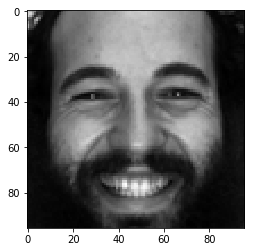

In [0]:
# Print a sample X image from the above data (0 is black, 1 is white)
img = train_X[0:1,:].reshape(96,96)
plt.imshow(img, cmap='gray') 

In [0]:
# Print a sample of y label data. x,y = 0,0 is the center of the image.
keypoints_1 = train_y[0:1,:]
print(keypoints_1,keypoints_1.shape, type(keypoints_1))

[[ 0.3816111  -0.21757638 -0.40208334 -0.21338195  0.21397223 -0.20919445
   0.56600696 -0.21338195 -0.20930555 -0.2008125  -0.5739097  -0.18404861
   0.167875   -0.37682638  0.6707778  -0.33072916 -0.16739583 -0.37263888
  -0.70382637 -0.23852777  0.03376389  0.22246528  0.4193264   0.5116389
  -0.38531944  0.5158264   0.02538195  0.4403889   0.03376389  0.8259514 ]] (1, 30) <class 'numpy.ndarray'>


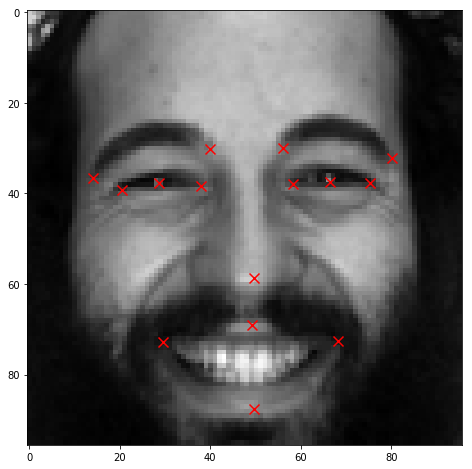

In [0]:
# print the sample image with the training 'labels' - keypoint indices marked on image.
# process y data into 2 columns - first is x and second is y for plotting points
keypoints_2 = keypoints_1.reshape(15,2)

# we normalized the keypoint locations, but to plot we need to 'un-normalize'
keypoints_3 = keypoints_2*48 + 48

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(keypoints_3[:,0],keypoints_3[:,1],c='r',marker="x", s=100)
plt.show()

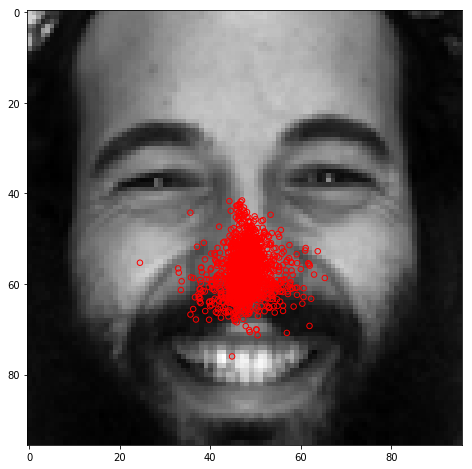

In [0]:
# Look at variability in training data using nose tip - element 10 (x is feature 20 and y is feature 21 in the train_y matrix- indexed from 0)
# define nose data:
nose = train_y[:,20:22]*48+48
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.scatter(nose[:,0],nose[:,1],edgecolors='r',marker="o",facecolors='none', s=30)
plt.show()

In [0]:
# DO Some Stats on the labels - and look at relative functions of labels with each other - which are correlated, can can we use this to our advantage for the data where labels are missing?

# 6. kNN Classification & Scoring

Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

# 7. Multinomial Naive Bayes Classification & Scoring
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

# 8. Logistic Regression Classification & Scoring
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

# 9. Neural Net Classification & Scoring  

Note - this example is from Week7 which requireds binarizing the labels before processing - not sure this is what we want.  
Make sure to add a commentary at the end with a summary of this section including what was done and what the result was (on Dev and Test)

DO: Single Layer
Do: Two Layer
Score Each

In [0]:
# Sample Code from Week 7 Tutorial - DON'T RUN AS IS, DATA SETS WON'T WORK
# Single layer NN

# Sample Binarization code:
def binarizeY(data):
    binarized_data = np.zeros((data.size,10))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i]=1
    return binarized_data
train_labels_b = binarizeY(train_labels)
test_labels_b = binarizeY(test_labels)
numClasses = train_labels_b[1].size
print('Classes = %d' %(numClasses))

In [0]:
## (1) Parameters 
# Initialize the weights to small, but non-zero, value
z = (np.random.randn(*(numFeatures, numClasses))*0.01)
print(z.shape, type(z))
z2 = np.asarray(z)
print(z2.shape, type(z2))
w = theano.shared((np.random.randn(*(numFeatures, numClasses))*.01))
print(w.ndim,type(w),type(w.get_value()))
print(w.dtype)
print(w.nonzero(), w.shape)

In [0]:
## (2) Model
# Theano objects accessed with standard Python variables
# using Softmax - i.e. basically just a multi-class version of sigmoid activation
X = T.matrix()
Y = T.matrix()

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))
y_hat = model(X, w)
print(y_hat,y_hat.dtype, y_hat.ndim, type(y_hat))

In [0]:
## (3) Cost function
cost = T.mean(T.nnet.categorical_crossentropy(y_hat, Y))
print(cost, cost.dtype, cost.ndim, type(cost))

In [0]:
## (4) Objective (and solver)

alpha = 0.01
gradient = T.grad(cost=cost, wrt=w) 
update = [[w, w - gradient * alpha]] 
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True) # computes cost, then runs update
y_pred = T.argmax(y_hat, axis=1) # select largest probability as prediction
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

def gradientDescent(epochs):
    trainTime = 0.0
    predictTime = 0.0
    for i in range(epochs):
        start_time = time.time()
        cost = train(train_data[0:len(train_data)], train_labels_b[0:len(train_data)])
        trainTime =  trainTime + (time.time() - start_time)
        print('%d) accuracy = %.4f' %(i+1, np.mean(np.argmax(test_labels_b, axis=1) == predict(test_data))))
    print('train time = %.2f' %(trainTime))

gradientDescent(50)

start_time = time.time()
predict(test_data)   
print('predict time = %.2f' %(time.time() - start_time))

Next Steps - do some/all/none of the following:
- Try Stochastic and Mini-Batch 
- Try 2 and 3 layer models
- Try using a different activation - like rectifier and/or max pooling
- Try adding noise (like Dropouts) - can increase generalization and training speeds

# 10. Convolutional Neural Net (CNN or ConvoNet)

**FINALLY**: *Convolutional NN*

- This is likely the prize - developed for image processing
- Need to reprocess data - uses 2D images (not 1D)
- Go to last section of Week7 Tutorial for code on Convolutional NNs
- Possibly do a generative model to create images and further train the network (e.g. by mirroring the faces - so making 2 faces out of one)

# 10. Conclusions  

Make sure to write up summary of different methods, results based on Dev and then on Test (maybe present in table). 